In [ ]:
# Roll Number = 210910 (even)

## Chart Patterns:

# Descending triangle
# Bull flag
# Inverse cup and handle
# Inverse head and shoulder
# Rounding bottom
# Edit out all the points on the stock's chart where the allotted chart patterns occur.
# Use your own intuition when identifying these patterns, such as defining roundness or the desired cup shape in the cup and handle pattern.
# The look-back period is 10 years with a 1-day tick interval. ###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
stocks = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'INFY.NS', 'ICICIBANK.NS', 'KOTAKBANK.NS', 'HINDUNILVR.NS', 'ITC.NS', 'SBIN.NS', 'LT.NS']


In [3]:
stock_dataframes = {}


In [4]:
for symbol in stocks:
    stock = yf.download(symbol, start='2013-01-01', end='2023-01-01', progress=False)
    stock = stock.reset_index()  # Reset index to get the 'Date' column as a regular column
    stock_dataframes[symbol] = stock

In [5]:
stock_dataframes['RELIANCE.NS'].head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,418.037415,419.325226,415.610443,416.402924,387.885132,3152667
1,2013-01-02,418.037415,423.981079,417.319244,419.993866,391.230133,6203434
2,2013-01-03,420.315826,426.952911,418.334595,426.333771,397.135864,7968629
3,2013-01-04,426.903381,428.240692,422.767578,426.878632,397.643402,6140890
4,2013-01-07,428.785553,431.410645,421.900787,424.278259,395.221161,7064261


In [6]:
### DESCENDING TRIANGLE:

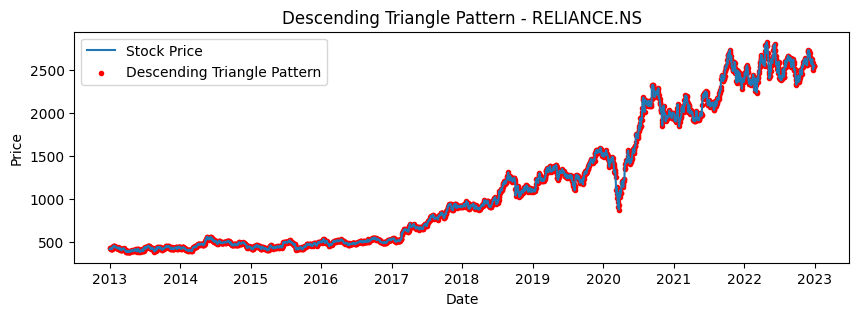

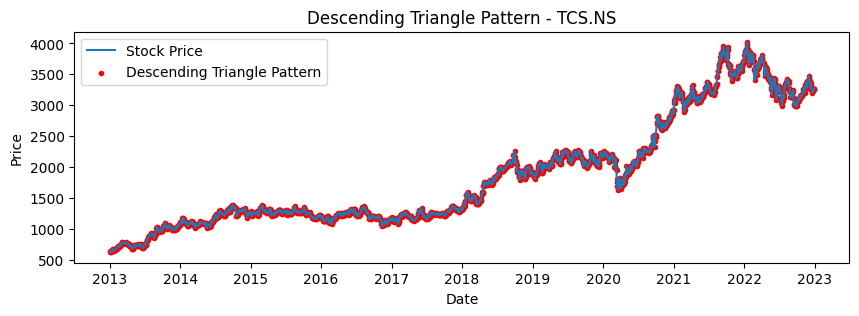

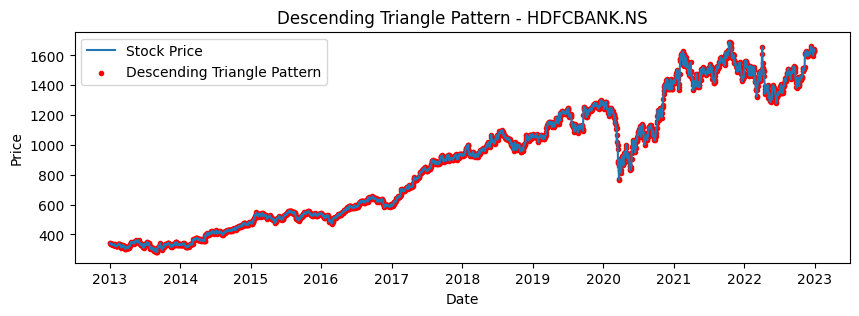

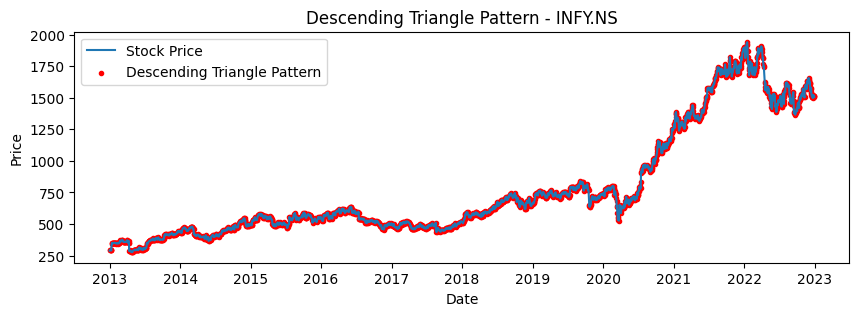

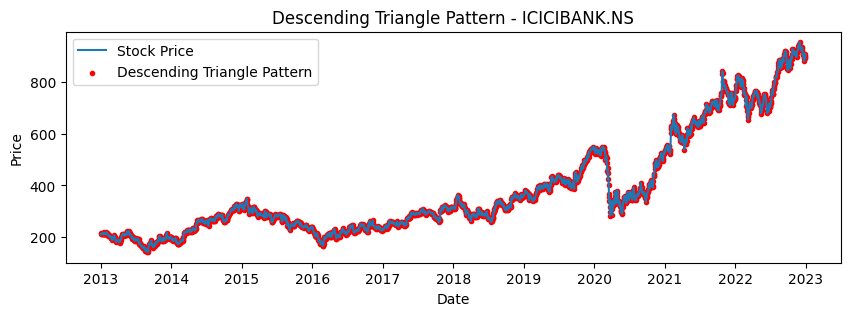

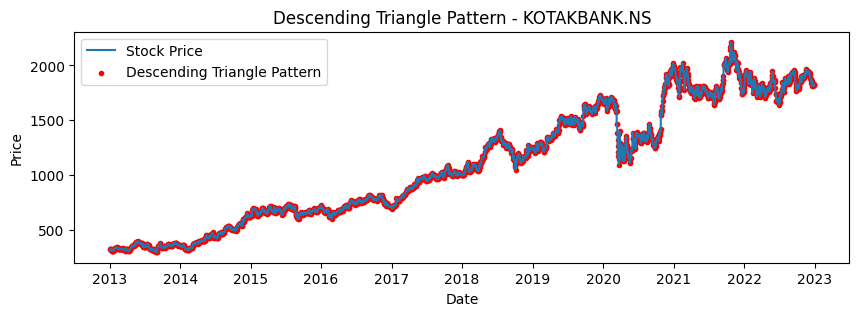

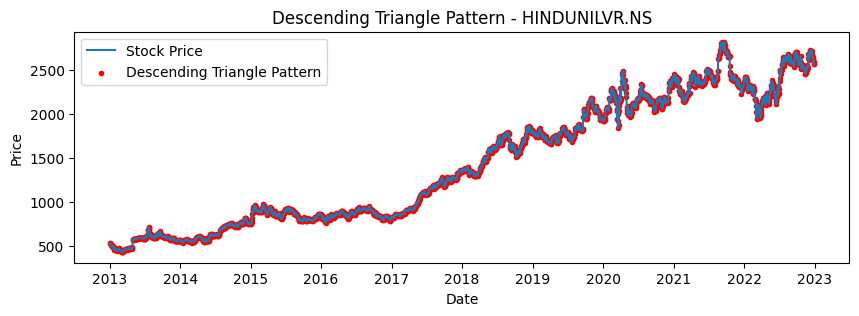

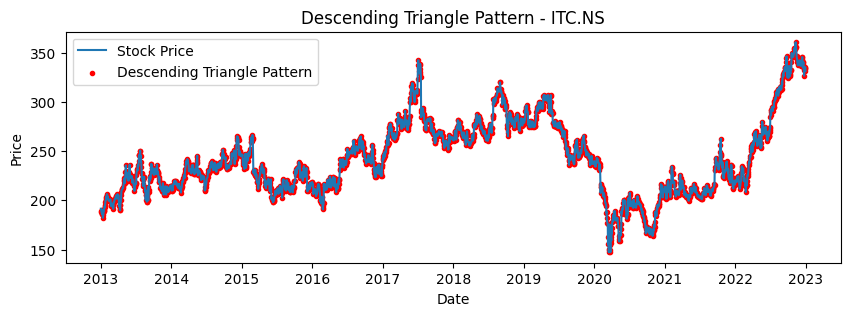

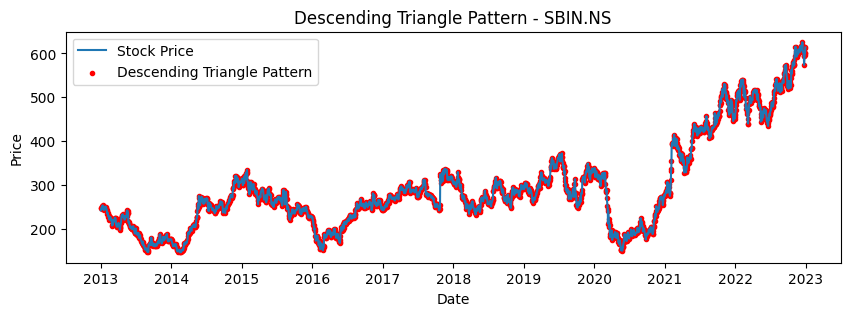

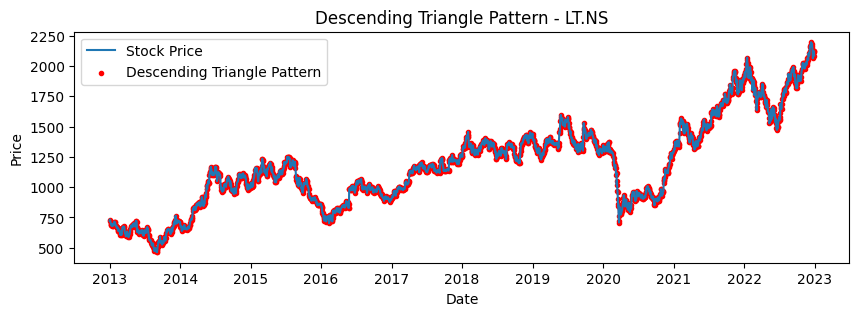

In [7]:
# Iterate over the dictionary and identify the descending triangle pattern for each stock
for symbol, df in stock_dataframes.items():
    # Adjust the dataframe to include the 'Date' column as the index
    df.set_index('Date', inplace=True)

    # Calculate the required parameters for the descending triangle pattern
    df['Resistance'] = df['High'].rolling(window=3).max()
    df['Support'] = df['Low'].rolling(window=3).min()

    # Identify the days where the pattern is present
    descending_triangle_days = df[(df['High'] <= df['Resistance']) & (df['Low'] >= df['Support'])]

    # Plot the descending triangle pattern
    plt.figure(figsize=(10, 3))
    plt.plot(df.index, df['Close'], label='Stock Price')
    plt.scatter(descending_triangle_days.index, descending_triangle_days['Close'], marker='.', color='red', label='Descending Triangle Pattern')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Descending Triangle Pattern - {symbol}')
    plt.legend()
    plt.show()


In [8]:
###Bull Flag

In [9]:
def plot_bull_flag(symbol, stock_dataframe):
    # Extract necessary columns from the stock dataframe
    dates = stock_dataframe['Date']
    high_prices = stock_dataframe['High']
    low_prices = stock_dataframe['Low']
    close_prices = stock_dataframe['Close']

    # Calculate the flagpole and flag boundaries
    flagpole_low = low_prices.idxmin()
    flagpole_high = high_prices[:flagpole_low].idxmax()
    flag_start = flagpole_low + 1
    flag_end = close_prices[flag_start:].idxmin()
    # Plot the stock price data
    plt.figure(figsize=(10, 3))
    plt.plot(dates, close_prices, label='Close Price')
    plt.plot(dates[flagpole_high:flag_end], close_prices[flagpole_high:flag_end], label='Bull Flag')

    # Plot flagpole and flag boundaries
    plt.axvline(x=dates[flagpole_high], color='g', linestyle='--', linewidth=1.5, label='Flagpole Low')
    plt.axvline(x=dates[flagpole_low], color='r', linestyle='--', linewidth=1.5, label='Flagpole High')
    plt.axvline(x=dates[flag_start], color='b', linestyle='--', linewidth=1.5, label='Flag Start')
    plt.axvline(x=dates[flag_end], color='b', linestyle='--', linewidth=1.5, label='Flag End')

    plt.title(f'Bull Flag Pattern for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


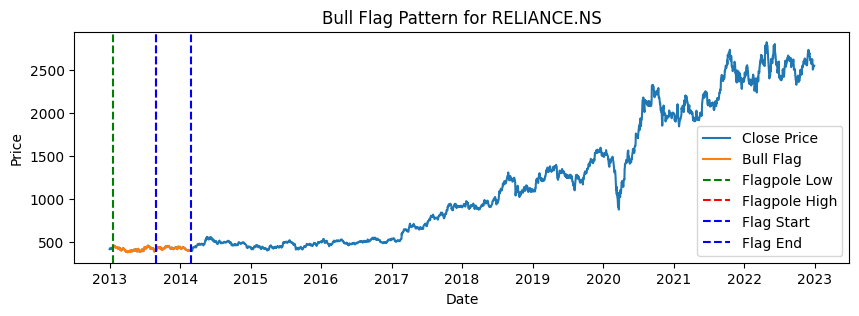

[*********************100%***********************]  1 of 1 completed


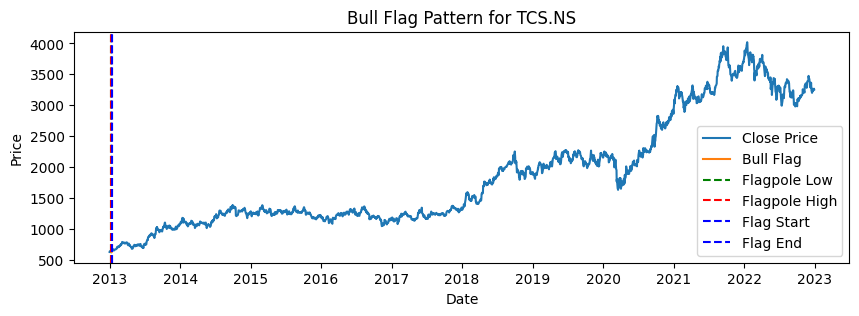

[*********************100%***********************]  1 of 1 completed


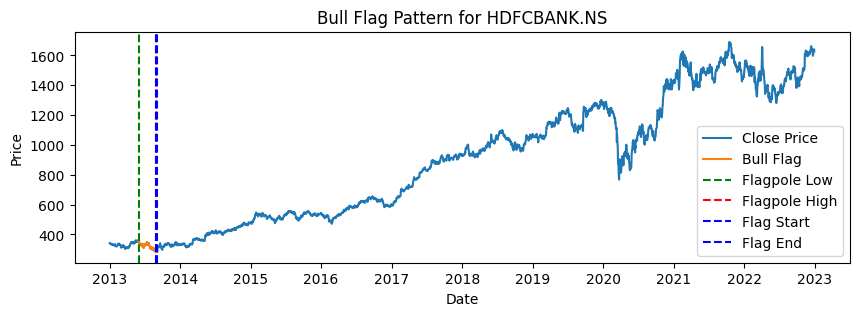

[*********************100%***********************]  1 of 1 completed


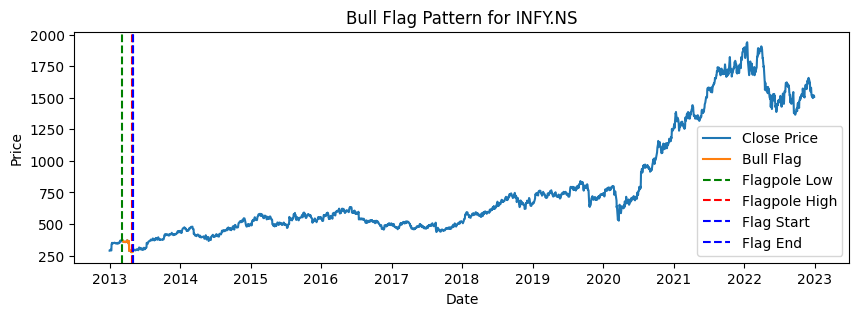

[*********************100%***********************]  1 of 1 completed


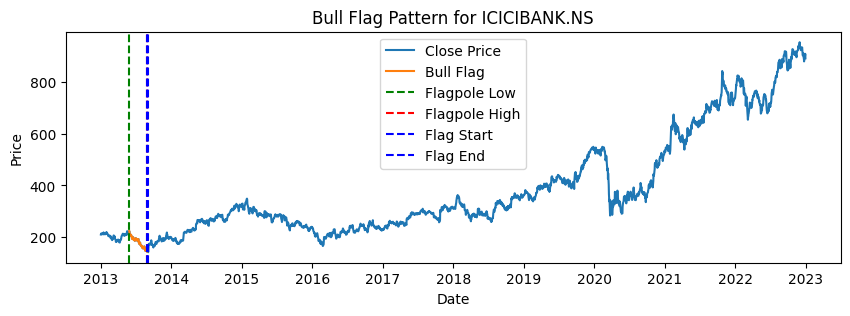

[*********************100%***********************]  1 of 1 completed


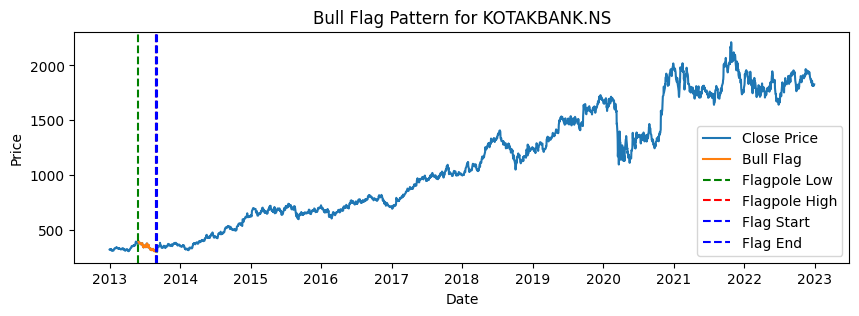

[*********************100%***********************]  1 of 1 completed


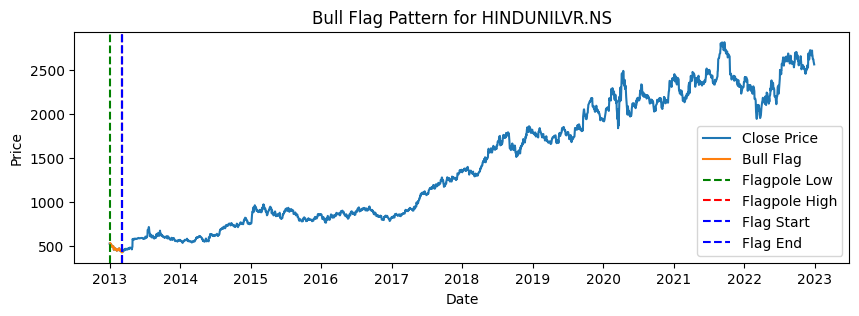

[*********************100%***********************]  1 of 1 completed


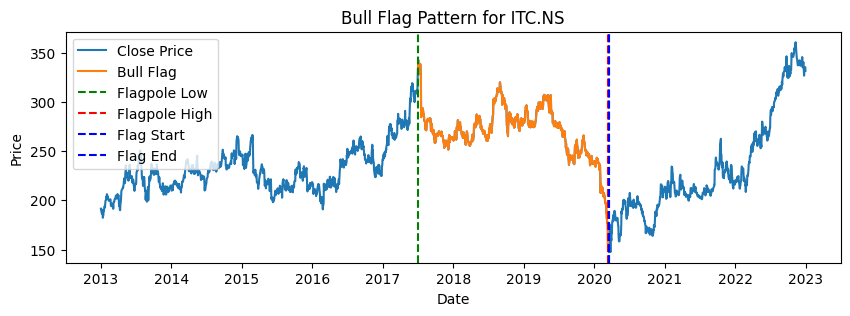

[*********************100%***********************]  1 of 1 completed


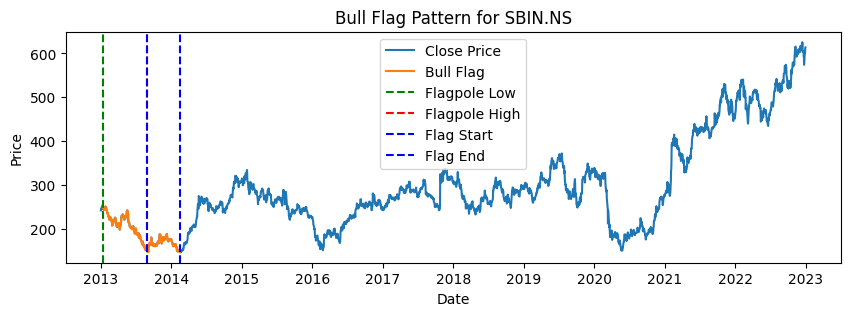

[*********************100%***********************]  1 of 1 completed


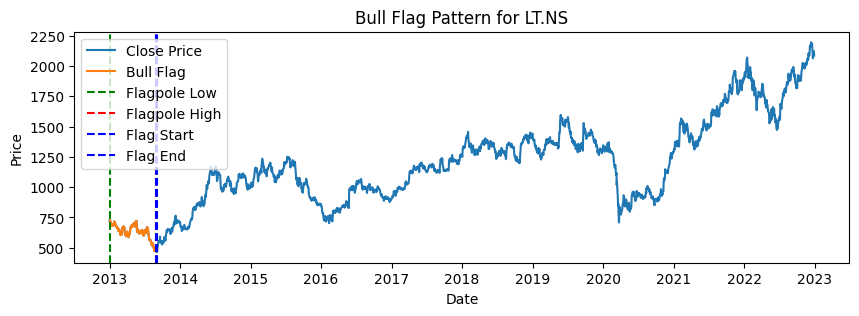

In [10]:
for symbol in stocks:
    stock = yf.download(symbol, start='2013-01-01', end='2023-01-01')
    stock = stock.reset_index()
    stock_dataframes[symbol] = stock
    plot_bull_flag(symbol, stock_dataframes[symbol])

In [11]:
### Inverted Cup and Handle

In [13]:
def plot_inverted_cup_and_handle(symbol, stock_dataframe):
    # Extract necessary columns from the stock dataframe
    dates = stock_dataframe['Date']
    high_prices = stock_dataframe['High']
    low_prices = stock_dataframe['Low']
    close_prices = stock_dataframe['Close']

    # Calculate the inverted cup and handle boundaries
    cup_start = high_prices.idxmax()
    cup_end = high_prices.idxmin()
    handle_start = cup_end + 1
    handle_end = close_prices[handle_start:].idxmin()

    # Plot the stock price data
    plt.figure(figsize=(10, 3))
    plt.plot(dates, close_prices, label='Close Price')
    plt.plot(dates[cup_start:handle_end], close_prices[cup_start:handle_end], label='Inverted Cup and Handle')

    # Plot inverted cup and handle boundaries
    plt.axvline(x=dates[cup_start], color='r', linestyle='--', linewidth=1.5, label='Cup Start')
    plt.axvline(x=dates[cup_end], color='r', linestyle='--', linewidth=1.5, label='Cup End')
    plt.axvline(x=dates[handle_start], color='b', linestyle='--', linewidth=1.5, label='Handle Start')
    plt.axvline(x=dates[handle_end], color='b', linestyle='--', linewidth=1.5, label='Handle End')

    plt.title(f'Inverted Cup and Handle Pattern for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


[*********************100%***********************]  1 of 1 completed


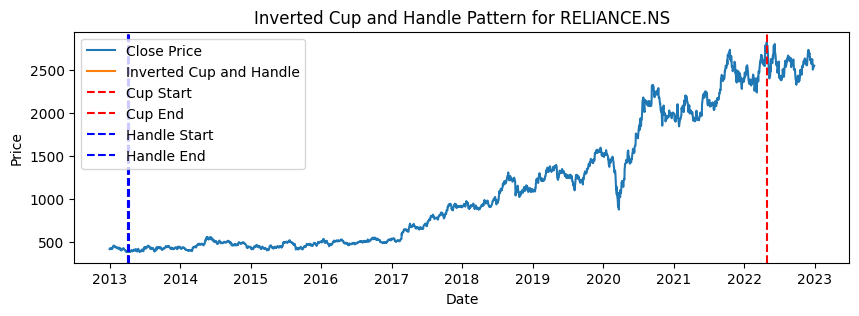

[*********************100%***********************]  1 of 1 completed


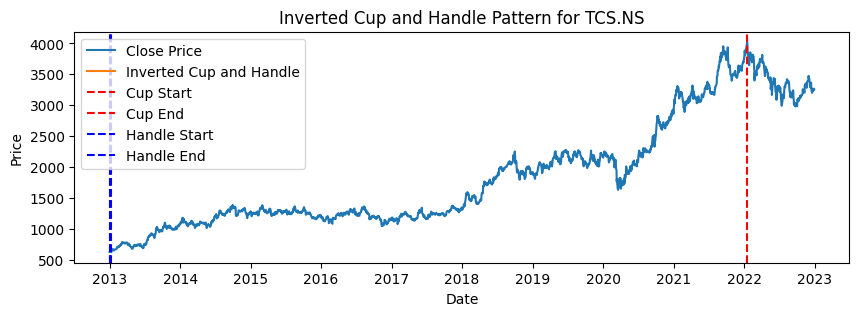

[*********************100%***********************]  1 of 1 completed


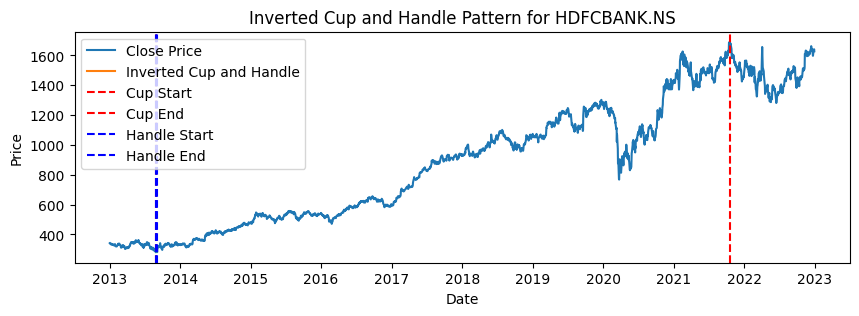

[*********************100%***********************]  1 of 1 completed


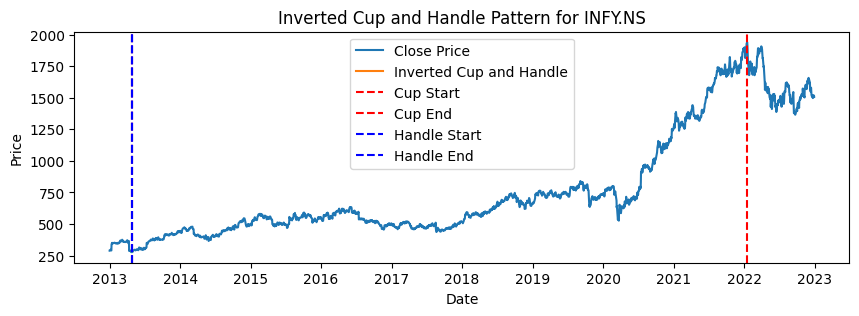

[*********************100%***********************]  1 of 1 completed


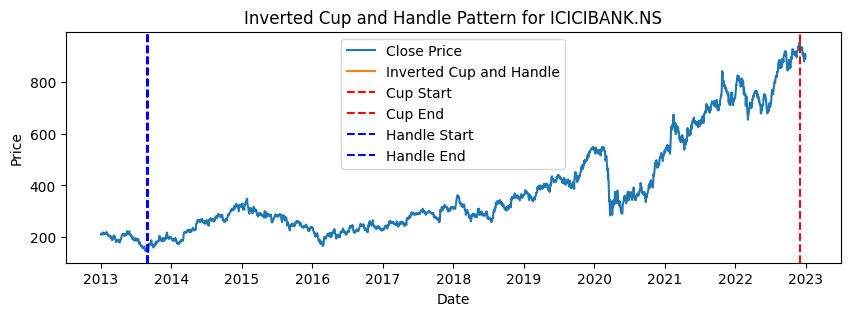

[*********************100%***********************]  1 of 1 completed


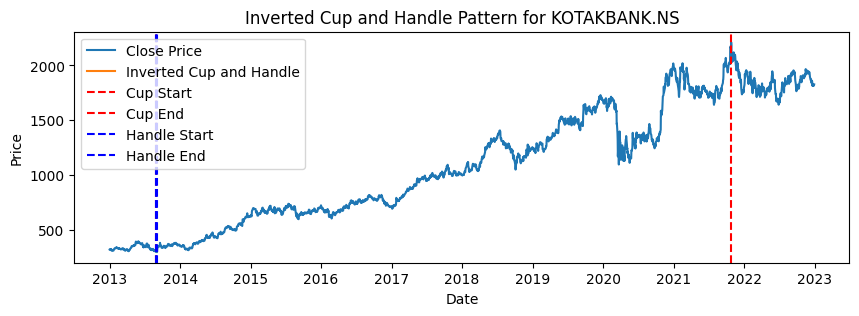

[*********************100%***********************]  1 of 1 completed


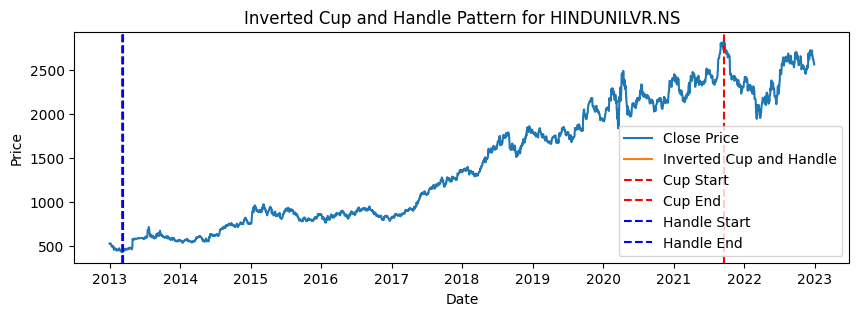

[*********************100%***********************]  1 of 1 completed


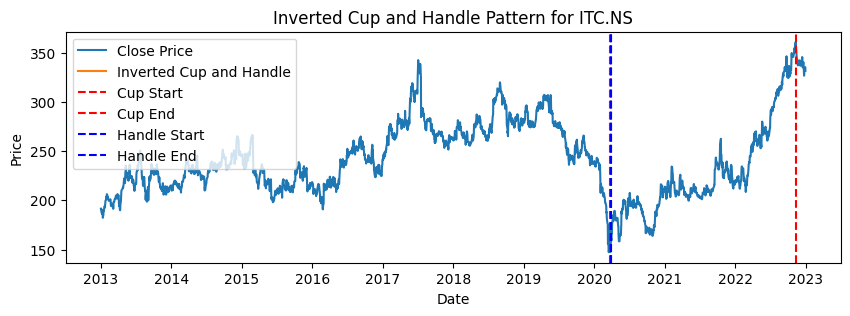

[*********************100%***********************]  1 of 1 completed


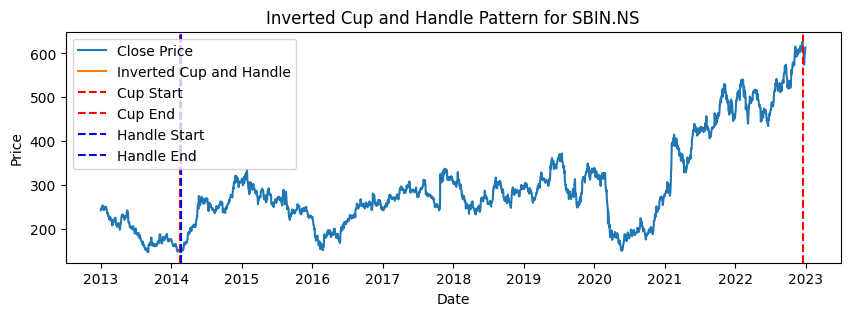

[*********************100%***********************]  1 of 1 completed


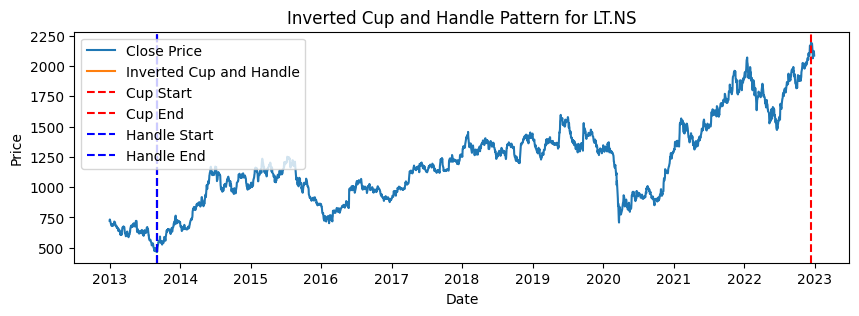

In [14]:
for symbol in stocks:
    stock = yf.download(symbol, start='2013-01-01', end='2023-01-01')
    stock = stock.reset_index()
    stock_dataframes[symbol] = stock
    plot_inverted_cup_and_handle(symbol, stock_dataframes[symbol])

In [15]:
### Inverted Head and Shoulder

In [17]:
def plot_inverted_head_and_shoulders(symbol, stock_dataframe):
    # Extract necessary columns from the stock dataframe
    dates = stock_dataframe['Date']
    high_prices = stock_dataframe['High']
    low_prices = stock_dataframe['Low']
    close_prices = stock_dataframe['Close']

    # Calculate the inverted head and shoulders boundaries
    left_shoulder_start = high_prices.idxmax()
    head_start = low_prices[left_shoulder_start:].idxmin()
    right_shoulder_start = low_prices[head_start:].idxmax()
    right_shoulder_end = close_prices[right_shoulder_start:].idxmax()

    # Plot the stock price data
    plt.figure(figsize=(10, 3))
    plt.plot(dates, close_prices, label='Close Price')
    plt.plot(dates[left_shoulder_start:right_shoulder_end], close_prices[left_shoulder_start:right_shoulder_end], label='Inverted Head and Shoulders')
    
    # Plot inverted head and shoulders boundaries
    plt.axvline(x=dates[left_shoulder_start], color='r', linestyle='--', linewidth=1.5, label='Left Shoulder Start')
    plt.axvline(x=dates[head_start], color='r', linestyle='--', linewidth=1.5, label='Head Start')
    plt.axvline(x=dates[right_shoulder_start], color='r', linestyle='--', linewidth=1.5, label='Right Shoulder Start')
    plt.axvline(x=dates[right_shoulder_end], color='r', linestyle='--', linewidth=1.5, label='Right Shoulder End')

    plt.title(f'Inverted Head and Shoulders Pattern for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


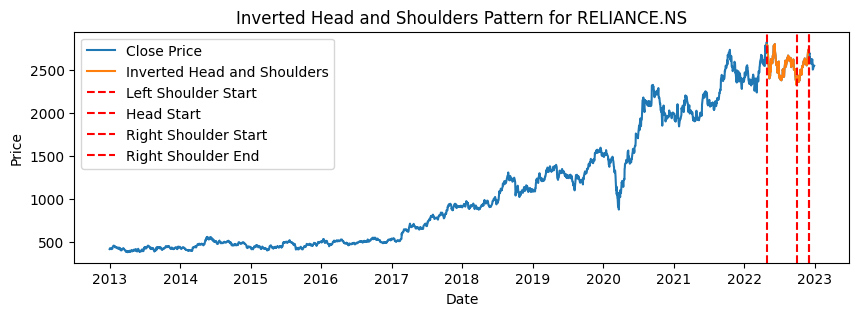

[*********************100%***********************]  1 of 1 completed


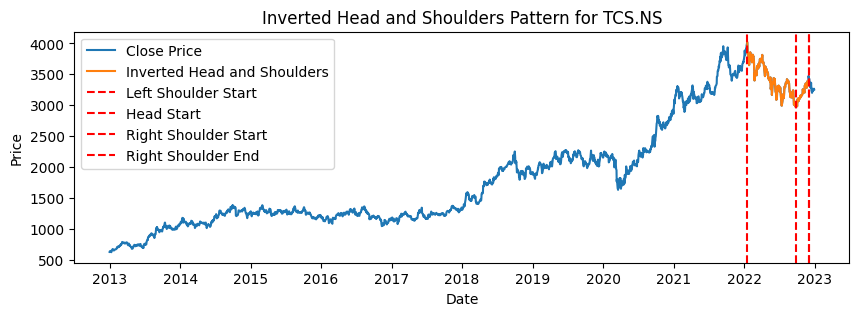

[*********************100%***********************]  1 of 1 completed


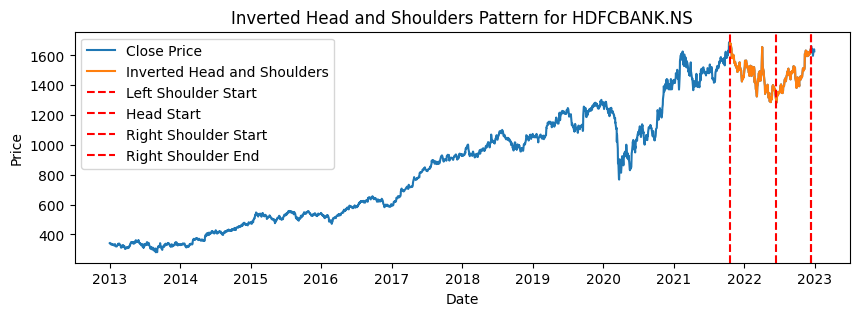

[*********************100%***********************]  1 of 1 completed


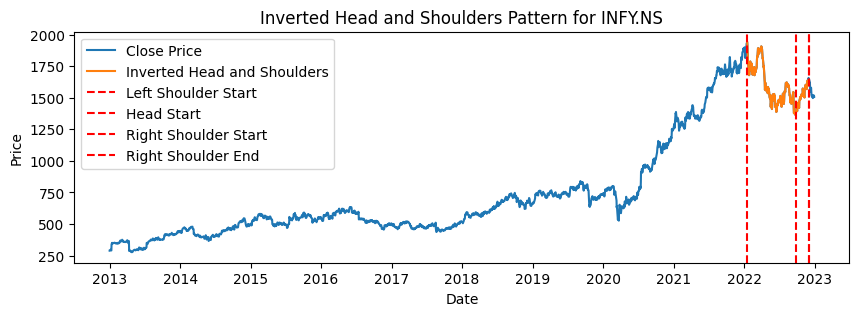

[*********************100%***********************]  1 of 1 completed


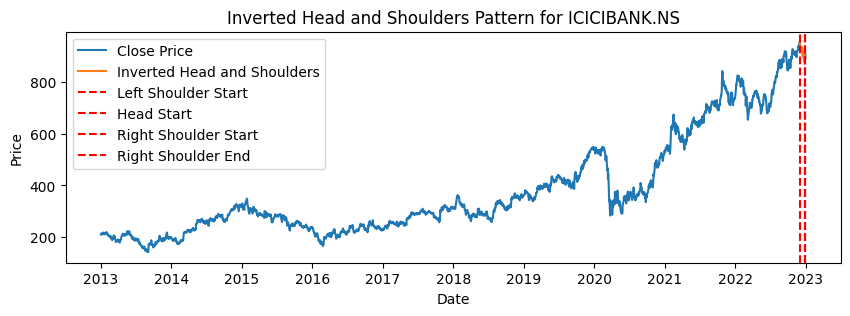

[*********************100%***********************]  1 of 1 completed


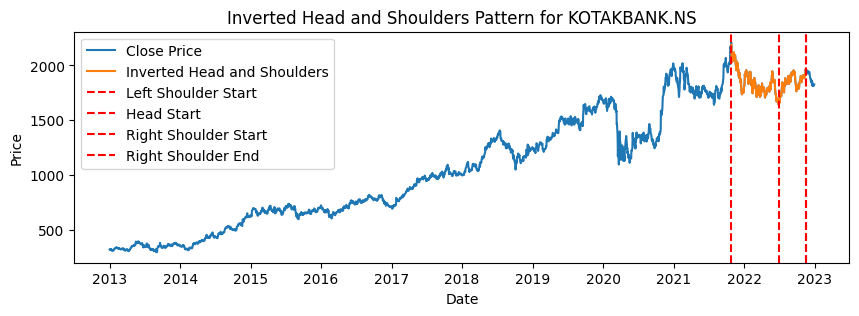

[*********************100%***********************]  1 of 1 completed


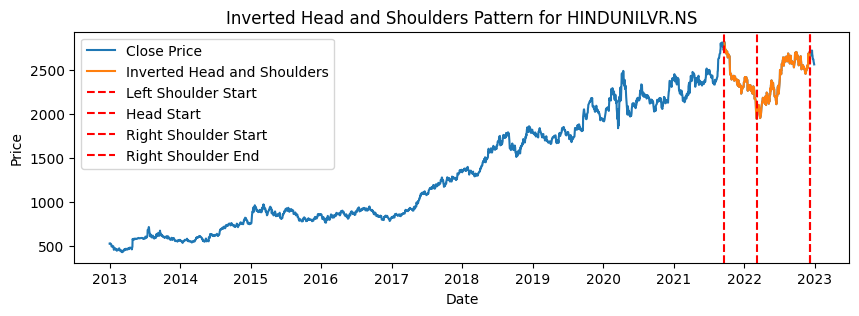

[*********************100%***********************]  1 of 1 completed


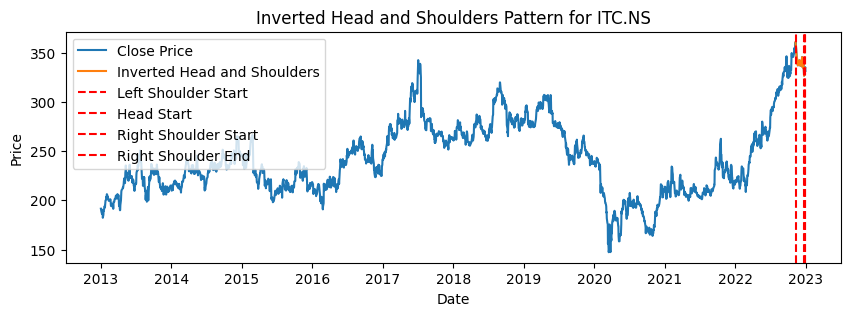

[*********************100%***********************]  1 of 1 completed


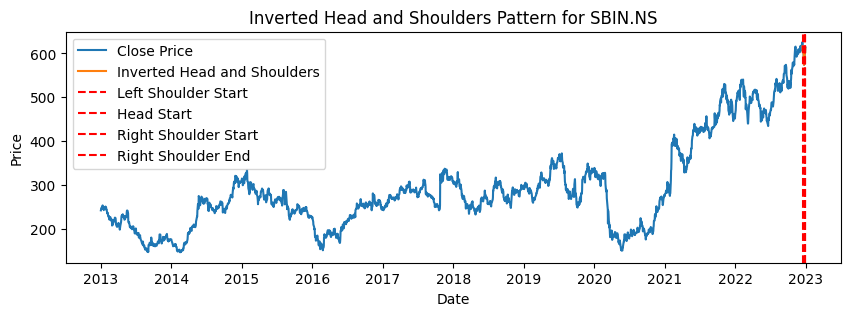

[*********************100%***********************]  1 of 1 completed


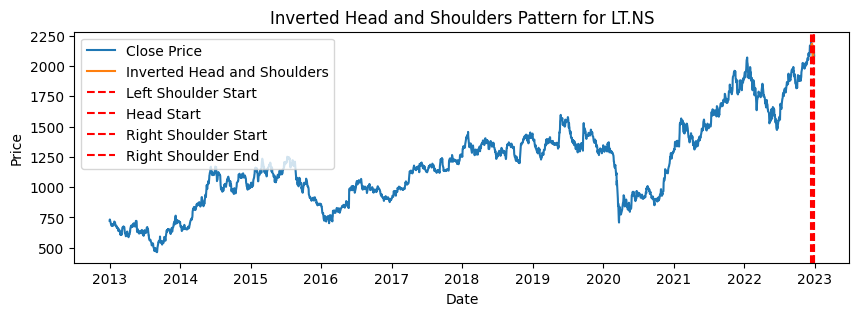

In [18]:
for symbol in stocks:
    stock = yf.download(symbol, start='2013-01-01', end='2023-01-01')
    stock = stock.reset_index()
    stock_dataframes[symbol] = stock
    plot_inverted_head_and_shoulders(symbol, stock_dataframes[symbol])

In [19]:
### Rounding Bottom:

In [20]:
def plot_rounding_bottom(symbol, stock_dataframe):
    # Extract necessary columns from the stock dataframe
    dates = stock_dataframe['Date']
    high_prices = stock_dataframe['High']
    low_prices = stock_dataframe['Low']
    close_prices = stock_dataframe['Close']

    # Calculate the rounding bottom boundaries
    low_points = low_prices[(low_prices.shift(1) > low_prices) & (low_prices.shift(-1) > low_prices)]
    rounding_bottom_start = low_points.idxmin()
    rounding_bottom_end = close_prices[rounding_bottom_start:].idxmax()

    # Plot the stock price data
    plt.figure(figsize=(10, 3))
    plt.plot(dates, close_prices, label='Close Price')
    plt.plot(dates[rounding_bottom_start:rounding_bottom_end], close_prices[rounding_bottom_start:rounding_bottom_end], label='Rounding Bottom')
    # Plot rounding bottom boundaries
    plt.axvline(x=dates[rounding_bottom_start], color='r', linestyle='--', linewidth=1.5, label='Rounding Bottom Start')
    plt.axvline(x=dates[rounding_bottom_end], color='r', linestyle='--', linewidth=1.5, label='Rounding Bottom End')

    plt.title(f'Rounding Bottom Pattern for {symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

[*********************100%***********************]  1 of 1 completed


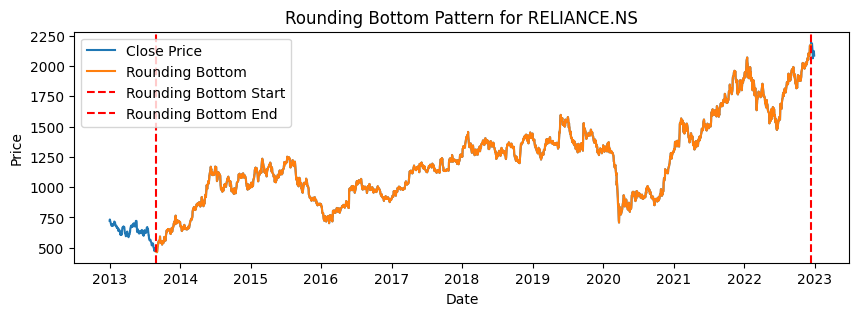

[*********************100%***********************]  1 of 1 completed


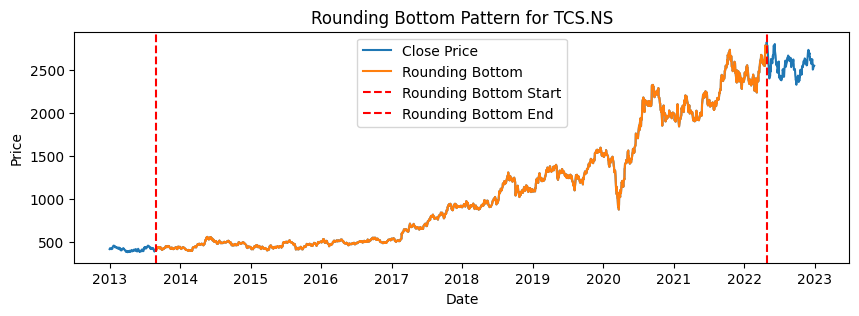

[*********************100%***********************]  1 of 1 completed


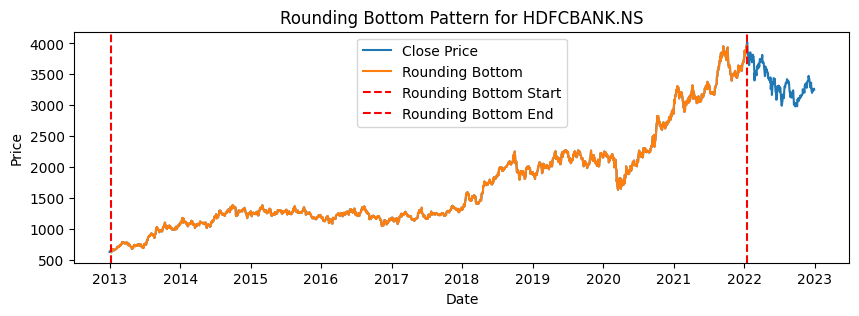

[*********************100%***********************]  1 of 1 completed


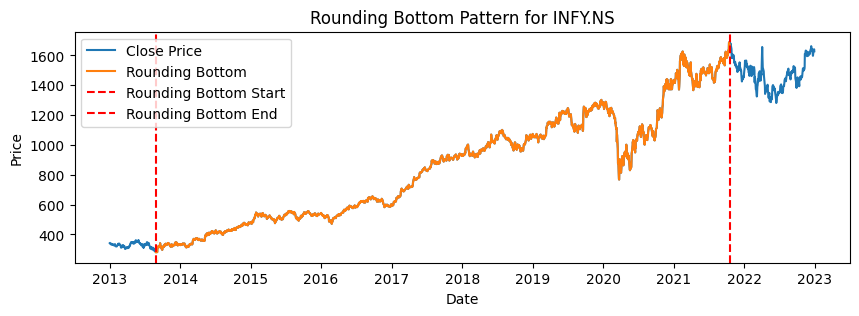

[*********************100%***********************]  1 of 1 completed


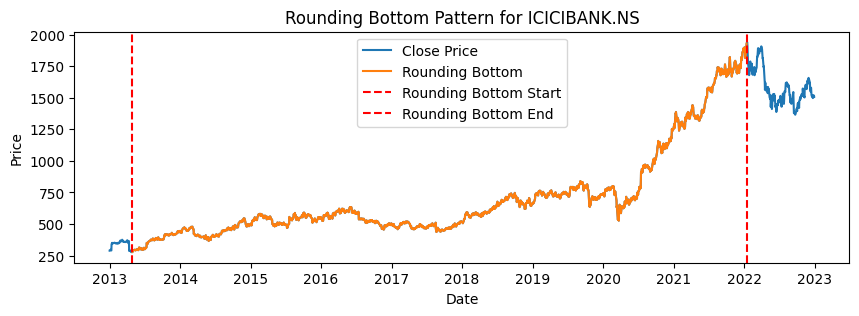

[*********************100%***********************]  1 of 1 completed


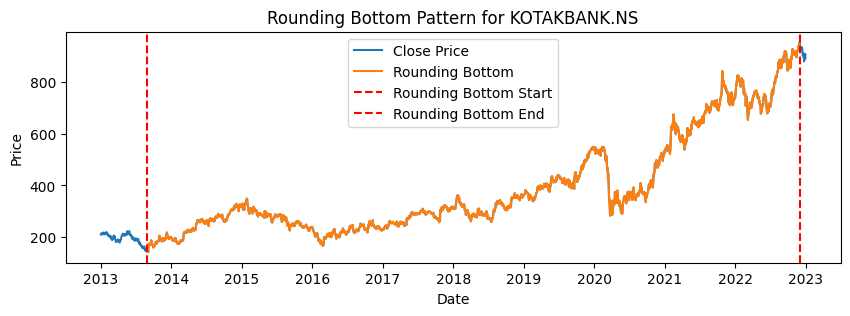

[*********************100%***********************]  1 of 1 completed


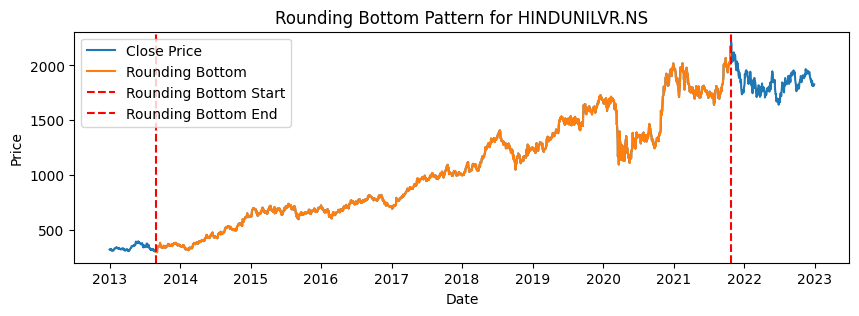

[*********************100%***********************]  1 of 1 completed


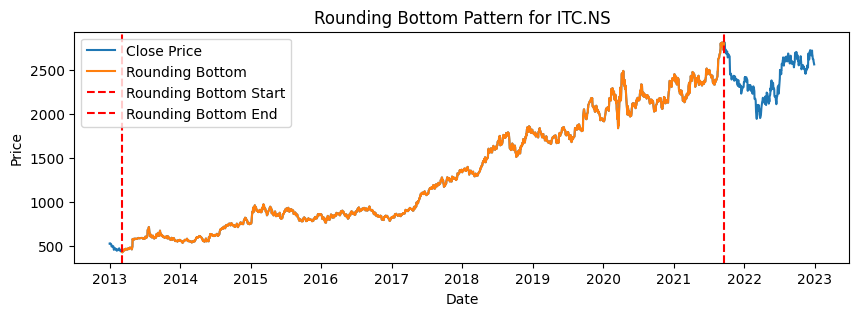

[*********************100%***********************]  1 of 1 completed


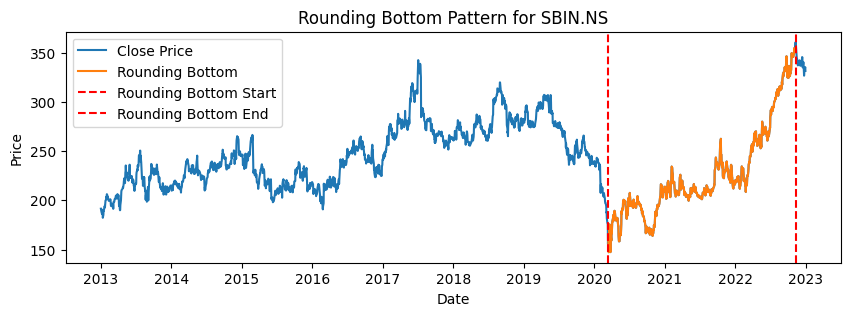

[*********************100%***********************]  1 of 1 completed


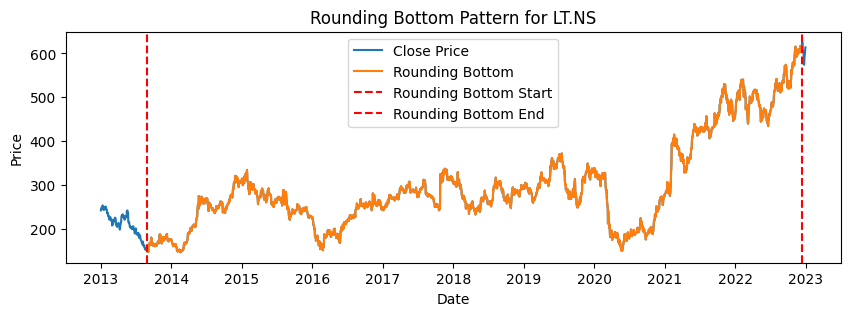

In [21]:
for symbol in stocks:
    stock_dataframes[symbol] = stock
    stock = yf.download(symbol, start='2013-01-01', end='2023-01-01')
    stock = stock.reset_index()
    plot_rounding_bottom(symbol, stock_dataframes[symbol])